<a href="https://colab.research.google.com/github/danielavela0227/AI_Agu-Dec-2024_BI_2002444/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniela Lizeth Vela Carrillo 2002444

Biomedical Engineering - AI

Class Time: Thursday N4N6

**Assignment 7.** The student will train a Convolutional Neural Network model in Google Colab using the Python programming language. This model will use the MNIST dataset; this dataset contains low-resolution images with handwritten digits from 0 to 9.

Step 1. Load libraries.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import datasets, layers, models
from keras.datasets import mnist
from random import randint

Step 2. Load data.

In [7]:
#Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Check the shape of the data
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


Step 3. Data preprocessing.

In [8]:
# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Step 4. Model selection and training.

In [21]:
# Initialize the Convolutional Neural Network (CNN)
model = models.Sequential()

# Add convolutional layers, pooling, and a fully connected output layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #Softmax on top layer

#Compile the midel
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
history = model.fit(train_images, train_labels, epochs=8, batch_size=180,
                    validation_data=(test_images, test_labels))

Epoch 1/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 50s 145ms/step - accuracy: 0.8075 - loss: 0.6759 - val_accuracy: 0.9767 - val_loss: 0.0791
Epoch 2/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 84s 152ms/step - accuracy: 0.9745 - loss: 0.0813 - val_accuracy: 0.9839 - val_loss: 0.0485
Epoch 3/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 48s 145ms/step - accuracy: 0.9860 - loss: 0.0489 - val_accuracy: 0.9853 - val_loss: 0.0445
Epoch 4/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.9876 - loss: 0.0422 - val_accuracy: 0.9866 - val_loss: 0.0420
Epoch 5/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 86s 148ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9895 - val_loss: 0.0315
Epoch 6/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.9913 - loss: 0.0275 - val_accuracy: 0.9900 - val_loss: 0.0322
Epoch 7/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 46s 137ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9884 - val_loss: 0.0342
Epoch 8/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 47s 140ms/step - accuracy: 0.9942 - loss: 0.0182 - 

In [22]:
#Structure of CNN
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

Step 5. Model testing.

Test Accuracy: 0.9897
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


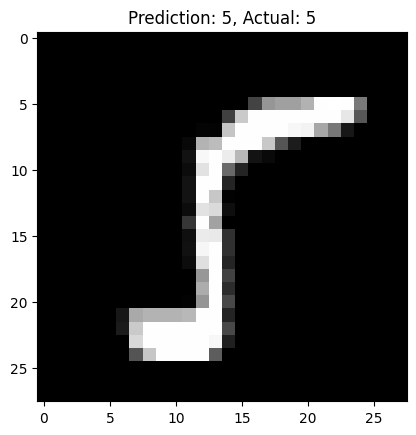

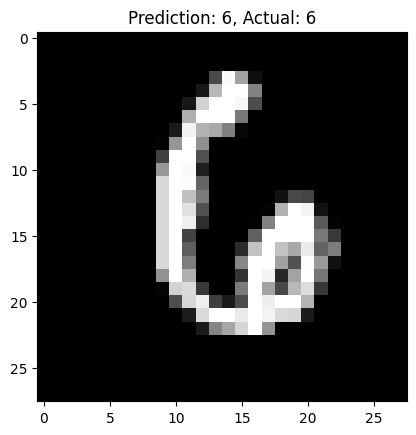

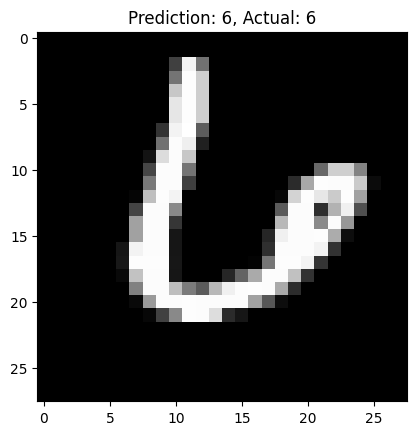

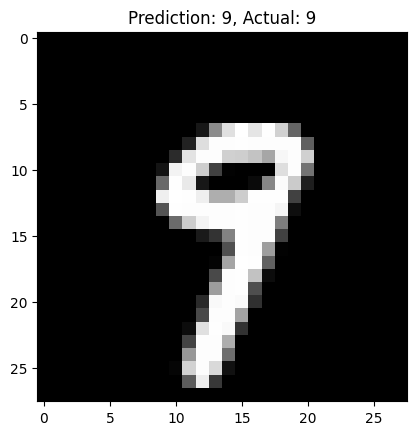

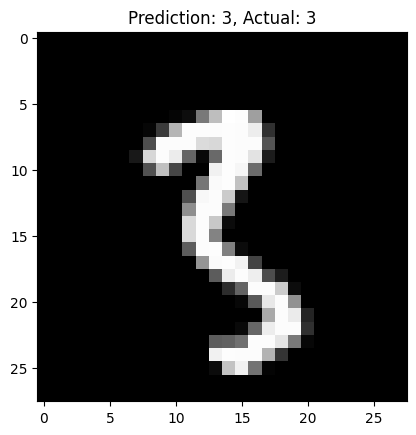

In [30]:
# Evaluate the model on test images
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict using the test images
predictions = model.predict(test_images)

# Display 5 sample predictions along with the actual values
for _ in range(5):
    i = randint(0, len(test_images))  #Random index
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {np.argmax(predictions[i])}, Actual: {test_labels[i]}")
    plt.show()

**How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?**

In this assignment, I am using 8 epochs, with a batch size of 180. So, I used 3 more epochs than the past task.

**Did you get a better performance on this assignment or on assignment 6? Why?**

The better performance during this task compared to the previous one, I believe, was due to the adjustment of epochs and batch sizes, as well as the fact that Convolutional Neural Networks are ideal for image data because they leverage spatial information. Unlike feedforward networks, CNNs detect key patterns, achieving superior performance on datasets like MNIST.